# Importando bibliotecas
# Carregando dados
# Dispersão dos dados (distplot (3 tipos), boxplot)
# Limpando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

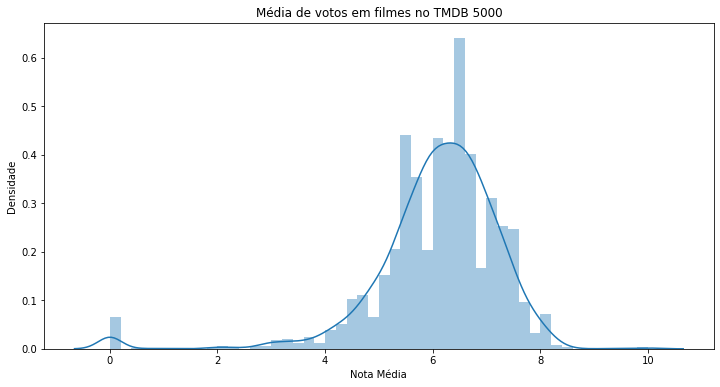

In [5]:
ax = sns.distplot(tmdb.vote_average)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Nota Média')
ax.set_ylabel('Densidade')
ax.set_title('Média de votos em filmes no TMDB 5000')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

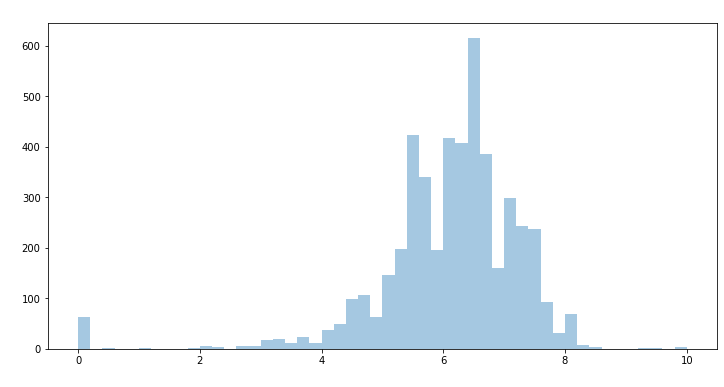

In [6]:
ax = sns.distplot(tmdb.vote_average, norm_hist=False, kde=False)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Nota Média', color='white')
ax.set_ylabel('Frequência', color='white')
ax.set_title('Média de votos em filmes no TMDB 5000', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Mota médioa do filme')

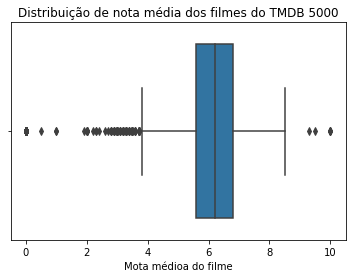

In [7]:
ax = sns.boxplot(tmdb.vote_average)
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000')
ax.set_xlabel('Mota médioa do filme')

Tem algo de estranho com os dados... não faz sentido filmes cuja nota média é 0 ou 10... Vamos ver?

In [8]:
tmdb. query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [9]:
tmdb.query('vote_average == 10')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


Detectamos que alguns filmes tiveram poucos votos (ou até mesmo nenhum). Decidimos que esses filmes não devem pertencer a nossa análise.

In [10]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 qcom pelo menos 10 votos')

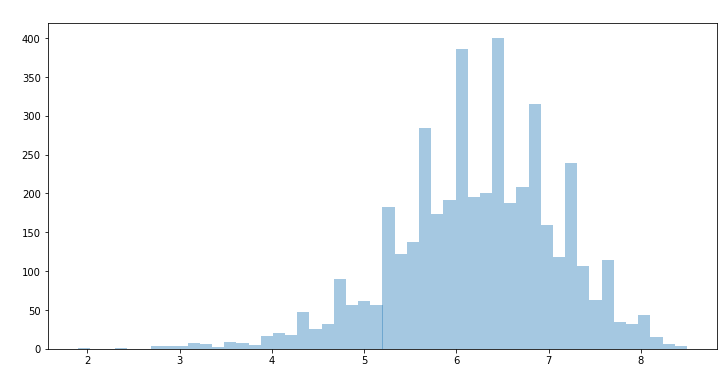

In [11]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist=False, kde=False)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Nota Média', color='white')
ax.set_ylabel('Frequência', color='white')
ax.set_title('Média de votos em filmes no TMDB 5000 qcom pelo menos 10 votos', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 qcom pelo menos 10 votos')

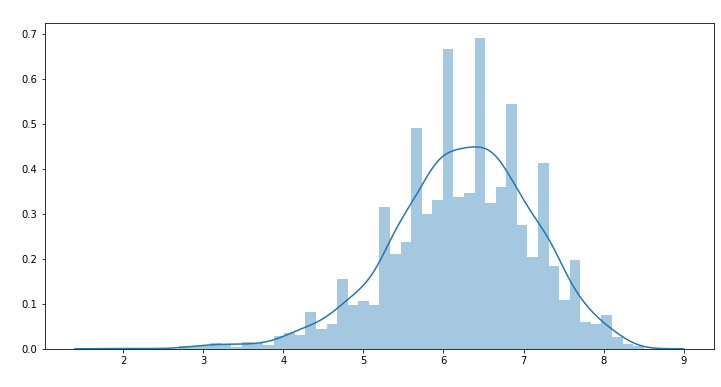

In [12]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Nota Média', color='white')
ax.set_ylabel('Frequência', color='white')
ax.set_title('Média de votos em filmes no TMDB 5000 qcom pelo menos 10 votos', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDD 5000 com pelo menos 10 votos')

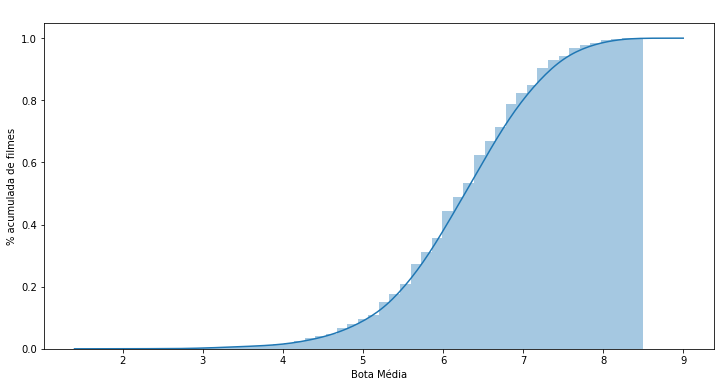

In [13]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, 
                  hist_kws={'cumulative':True},
                  kde_kws={'cumulative':True})
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Bota Média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no TMDD 5000 com pelo menos 10 votos', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Mota médioa do filme')

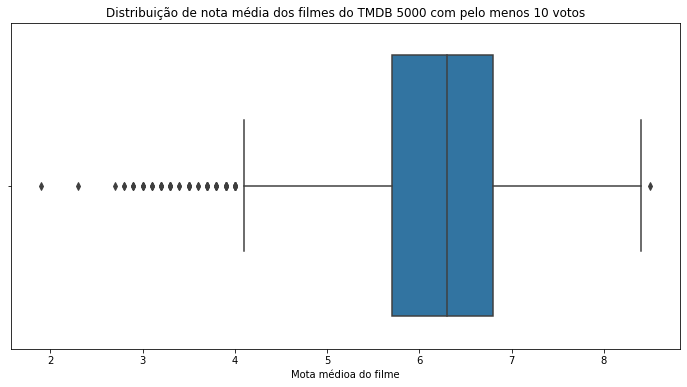

In [14]:
ax = sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000 com pelo menos 10 votos')
ax.set_xlabel('Mota médioa do filme')

Analisaremos também as avaliações do MovieLens

In [15]:
notas = pd.read_csv('ratings.csv')

In [16]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
nota_media_por_filme = notas.groupby('movieId')['rating'].mean()
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100k')

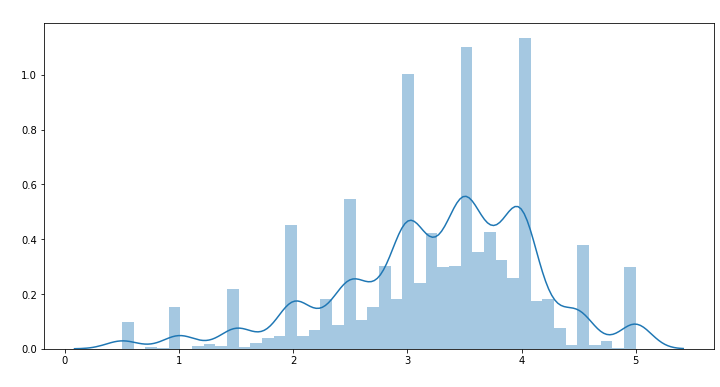

In [18]:
ax = sns.distplot(nota_media_por_filme.values)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Nota Média', color='white')
ax.set_ylabel('Densidade', color='white')
ax.set_title('Média de votos em filmes no MovieLens 100k', color='white')

In [19]:
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index

In [20]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100k com pelo menos 10 votos')

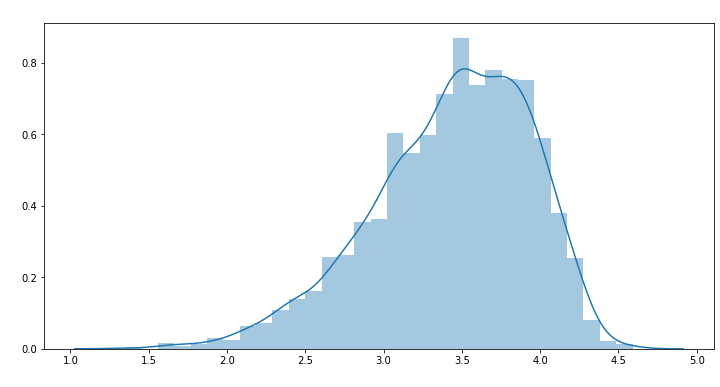

In [21]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Nota Média', color='white')
ax.set_ylabel('Densidade', color='white')
ax.set_title('Média de votos em filmes no MovieLens 100k com pelo menos 10 votos', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100k com pelo menos 10 votos')

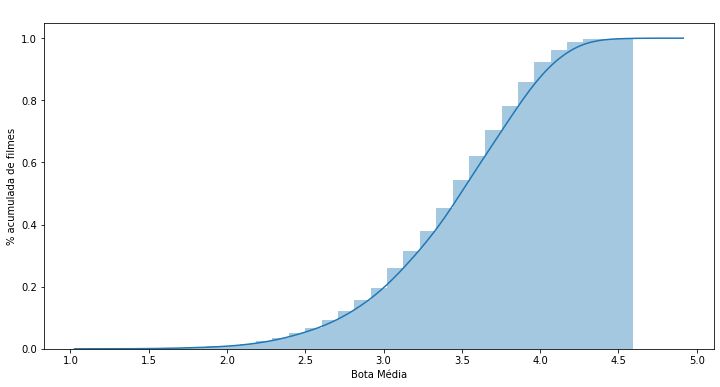

In [22]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, 
                  hist_kws={'cumulative':True},
                  kde_kws={'cumulative':True})
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Bota Média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no MovieLens 100k com pelo menos 10 votos', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Mota médioa do filme')

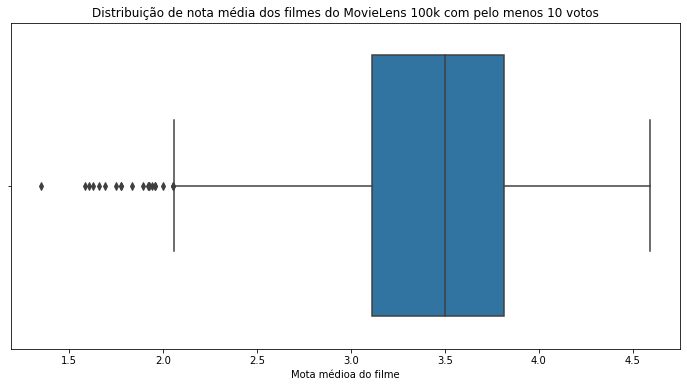

In [23]:
ax = sns.boxplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de nota média dos filmes do MovieLens 100k com pelo menos 10 votos')
ax.set_xlabel('Mota médioa do filme')

# Analisando a distribuição dos dados capturados de outros campos do TMDB

In [24]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [25]:
tmdb_com_mais_de_10_votos.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Contagem de votos em filmes no TMDB 5000 com pelo menos 10 votos')

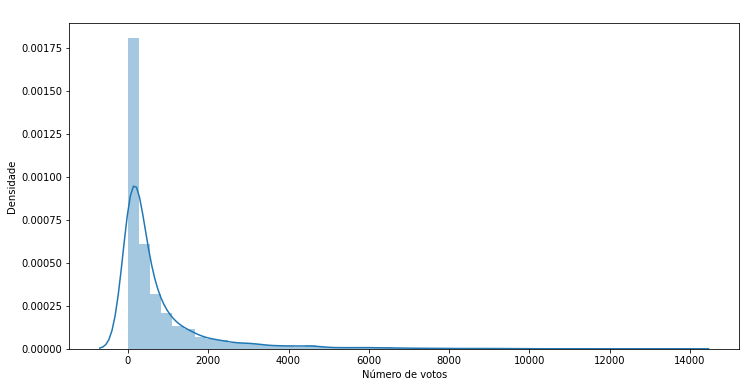

In [26]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Número de votos', ylabel='Densidade')
ax.set_title('Contagem de votos em filmes no TMDB 5000 com pelo menos 10 votos', color='white')

In [27]:
tmdb.query('budget > 0').budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Orçamento dos filmes no TMDB 5000')

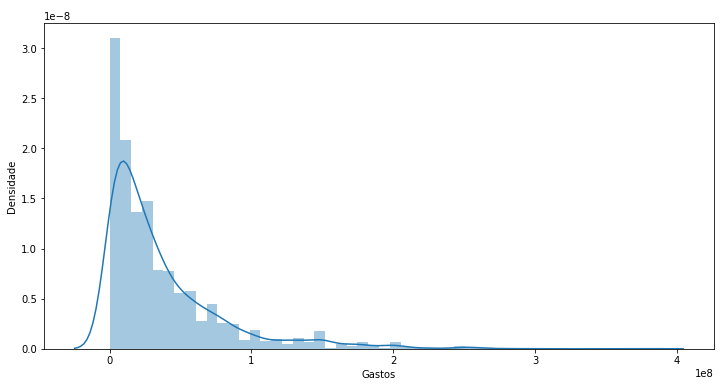

In [28]:
ax = sns.distplot(tmdb.query('budget > 0').budget)
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Gastos', ylabel='Densidade')
ax.set_title('Orçamento dos filmes no TMDB 5000', color='white')

In [29]:
tmdb.popularity

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5000')

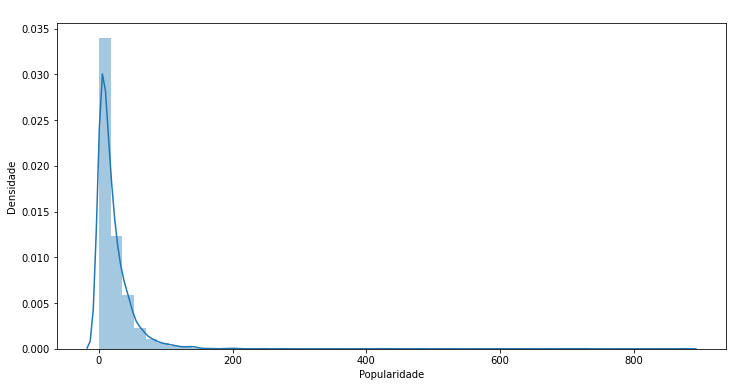

In [30]:
ax = sns.distplot(tmdb.popularity)
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade dos filmes no TMDB 5000', color='white')

In [31]:
tmdb.runtime

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4803, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de duração dos filmes no TMDB 5000')

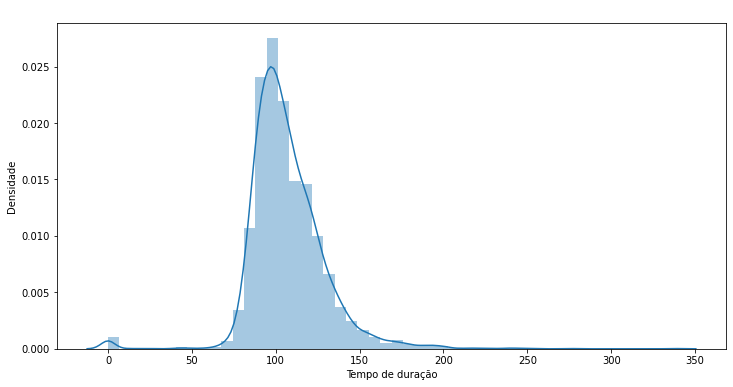

In [32]:
ax = sns.distplot(tmdb.runtime)
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Tempo de duração dos filmes no TMDB 5000', color='white')

In [33]:
 tmdb.runtime.isnull().value_counts()

False    4801
True        2
Name: runtime, dtype: int64

In [34]:
 tmdb.runtime.dropna()

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4801, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de duração dos filmes no TMDB 5000')

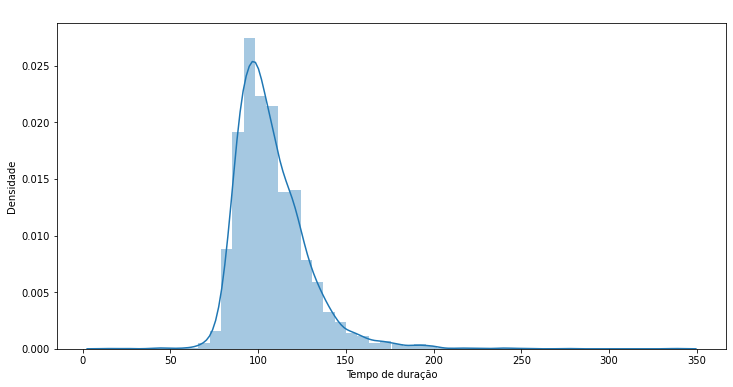

In [35]:
ax = sns.distplot(tmdb.query('runtime != 0').runtime.dropna())
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Tempo de duração dos filmes no TMDB 5000', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de duração dos filmes no TMDB 5000')

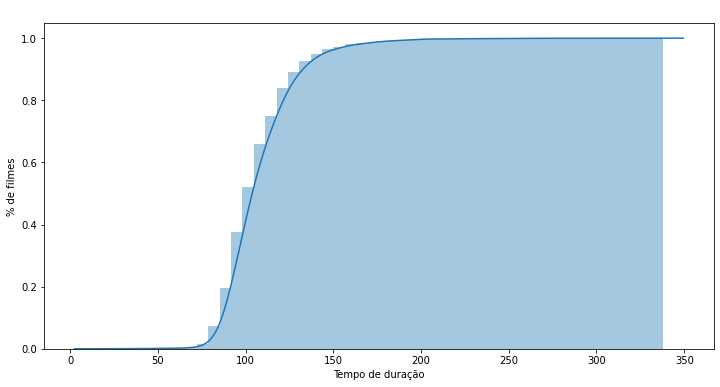

In [36]:
ax = sns.distplot(tmdb.query('runtime != 0').runtime.dropna(),
                  hist_kws={'cumulative':True},
                  kde_kws={'cumulative': True})
ax.figure.set_size_inches(12,6)
ax.set(xlabel='Tempo de duração', ylabel='% de filmes')
ax.set_title('Tempo de duração dos filmes no TMDB 5000', color='white')

In [37]:
tmdb.query('runtime != 0').runtime.dropna().quantile(0.8)

121.0

# MovieLens: Média dos filmes com pleo menos 10 votos



In [38]:
print('Média dos filmes com pelo menos 10 votos: ', nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos:  3.4320503405352603


In [39]:
nota_media_dos_filmes_com_pelo_menos_10_votos.shape[0]

2269

In [40]:
medias = []
for i in range(1,len(nota_media_dos_filmes_com_pelo_menos_10_votos)):
  medias.append(nota_media_dos_filmes_com_pelo_menos_10_votos[0:i].mean())

In [41]:
import matplotlib.pyplot as plt

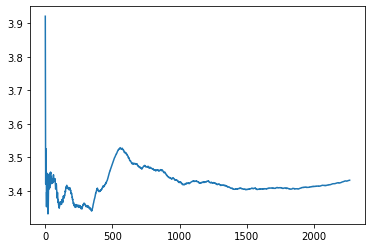

In [42]:
plt.plot(medias)

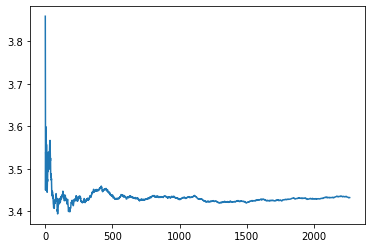

In [43]:
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1,len(temp))]
plt.plot(medias)

In [44]:
from statsmodels.stats.weightstats import zconfint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [46]:
from statsmodels.stats.weightstats import DescrStatsW

In [47]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)

In [48]:
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Analisando um filme específico

In [49]:
filmes = pd.read_csv('movies.csv')
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [50]:
notas1 = notas.query('movieId == 1')
notas1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Notas para o Toy Story')

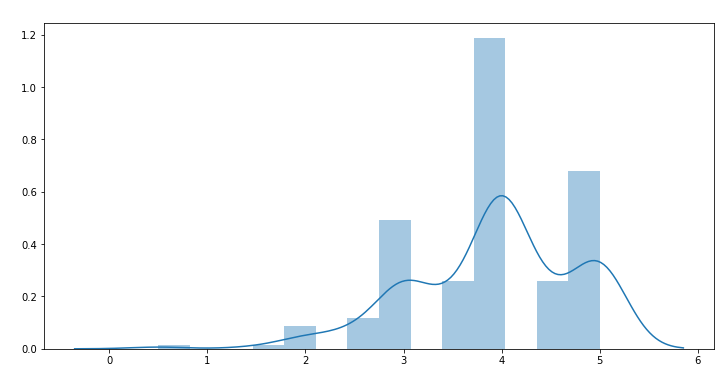

In [51]:
ax = sns.distplot(notas1.rating)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Nota', color='white')
ax.set_ylabel('Densidade', color='white')
ax.set_title('Notas para o Toy Story', color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Mota médioa do filme')

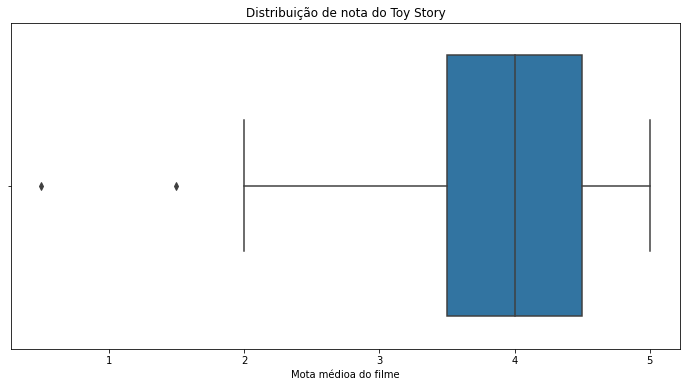

In [52]:
ax = sns.boxplot(notas1['rating'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de nota do Toy Story')
ax.set_xlabel('Mota médioa do filme')

In [53]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [54]:
from statsmodels.stats.weightstats import ztest
ztest(notas1.rating, value=3.4320503405352594)

(8.586342305916732, 8.978190401885648e-18)

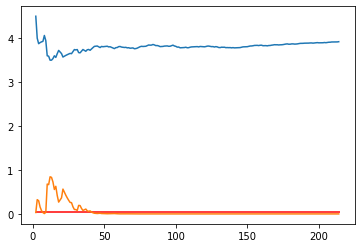

In [55]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405352594)
  return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2,len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y=0.05, xmin = 2, xmax = len(temp), color='r')

# Comparando dois conjuntos de amostras

In [56]:
zconfint(notas1.rating, notas.rating)

(0.2799245129192442, 0.5588219849631111)

In [57]:
print(ztest(notas1.rating, notas.rating))

(5.894327101501841, 3.762112778881965e-09)


In [58]:
from scipy.stats import ttest_ind

ttest_ind(notas.rating,notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [61]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

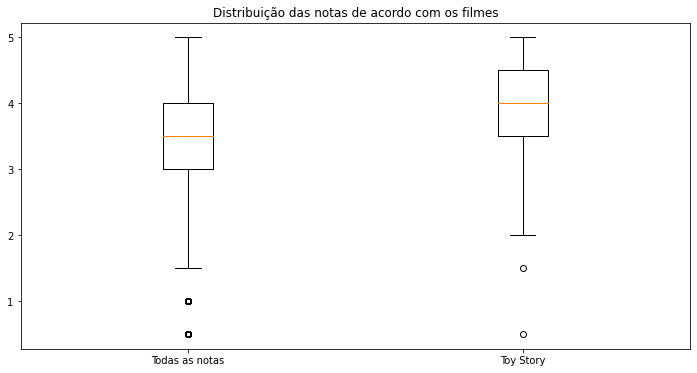

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))

plt.boxplot([notas.rating, notas1.rating],labels=['Todas as notas','Toy Story'])
plt.title('Distribuição das notas de acordo com os filmes')

Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

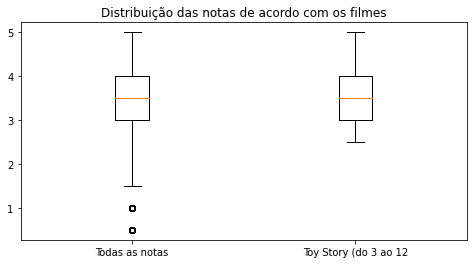

In [76]:
plt.figure(figsize=(8,4))

plt.boxplot([notas.rating, notas1[3:12].rating],labels=['Todas as notas','Toy Story (do 3 ao 12'])
plt.title('Distribuição das notas de acordo com os filmes')

In [73]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


# Comparando a média de dois filmes

In [78]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

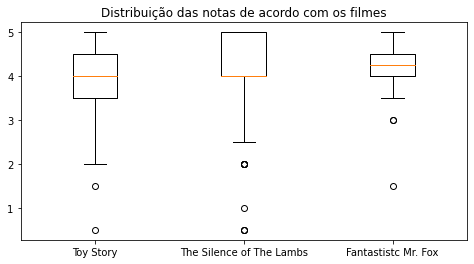

In [84]:
plt.figure(figsize=(8,4))

notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating],labels=['Toy Story', 'The Silence of The Lambs', 'Fantastistc Mr. Fox'])
plt.title('Distribuição das notas de acordo com os filmes')

In [86]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


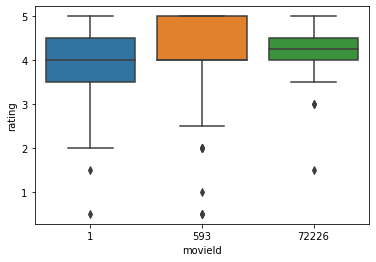

In [87]:
sns.boxplot(x = 'movieId', y='rating', data=notas.query('movieId in (1,593,72226)'))

In [94]:
notas.query('movieId in (1,593,72226)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [97]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
comparacao.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [95]:
descr_72226 = DescrStatsW(notas72226.rating)

comparacao = descr_72226.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [96]:
comparacao = descr_72226.get_compare(descr_1)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1624,0.206,0.788,0.431,-0.243,0.568


In [98]:
from scipy.stats import normaltest

In [103]:
_, p =normaltest(notas1.rating)
p

0.00011053430732728716

In [105]:
from scipy.stats import ranksums

_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693